## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv(r"C:\Users\anand\Downloads\Zomato data .csv")

In [3]:
dataframe.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


Convert rate column data type into float data type by removing denominator.

In [4]:
def handlerate(value) :
    value = str(value).split('/')
    value = value[0];
    return float(value)

In [5]:
dataframe['rate'] = dataframe['rate'].apply(handlerate)

In [6]:
dataframe.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


There are No Null Values.

Text(0.5, 0, 'Types Of Restaurant')

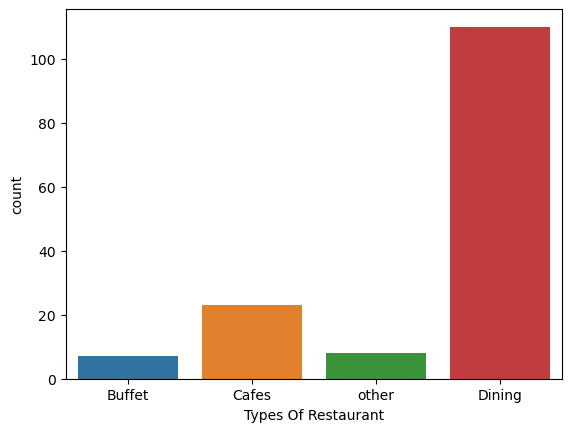

In [8]:
sns.countplot(x = dataframe['listed_in(type)'])
plt.xlabel("Types Of Restaurant")

Conclusion: The majority of the restaurants fall into the dining category.

Text(0, 0.5, 'Votes')

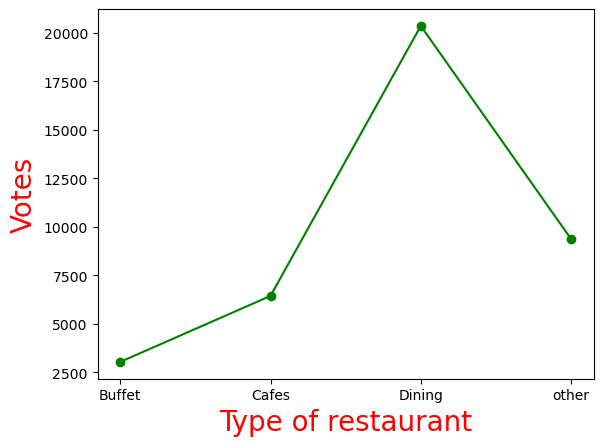

In [9]:
grouped_data = dataframe.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({'votes' : grouped_data })
plt.plot(result,color = 'green', marker = 'o')
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

Conclusion: Dining restaurants are preferred by a larger number of individuals.

Find Maximum votes given to the restaurant

In [10]:
max_votes = dataframe['votes'].max()
max_votes

4884

In [11]:
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes,'name']

In [12]:
print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


Explore online order column

<Axes: xlabel='online_order', ylabel='count'>

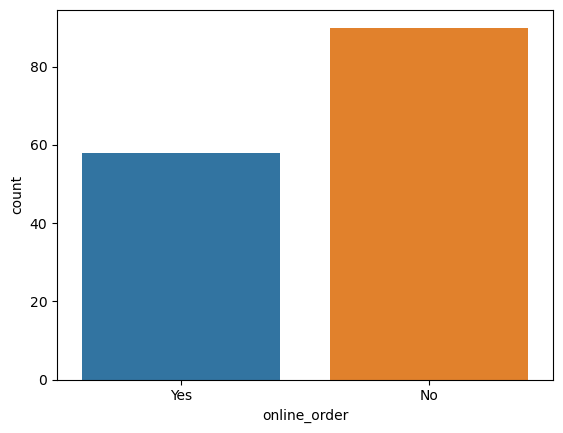

In [13]:
sns.countplot(x = dataframe['online_order'])

Conclusion: This suggests that a majority of the restaurants do not accept online orders.

Explore Rating Column

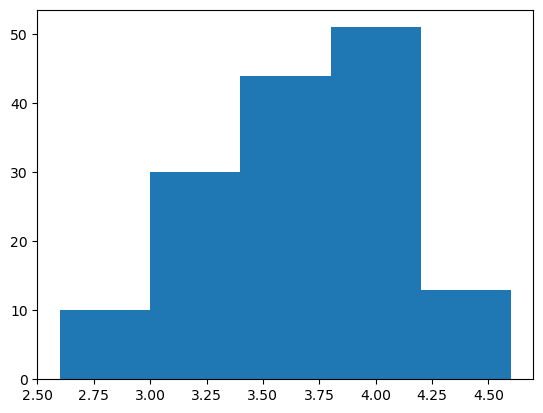

In [14]:
plt.hist(dataframe['rate'],bins = 5)
plt.show()

Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.

Explore approx_cost(for two people) column

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

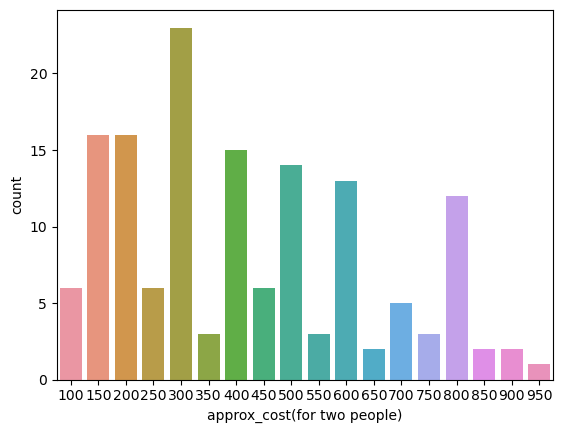

In [15]:
sns.countplot(x = dataframe['approx_cost(for two people)'])

Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

Explore whether online orders has higher rating than offline orders

<Axes: xlabel='online_order', ylabel='rate'>

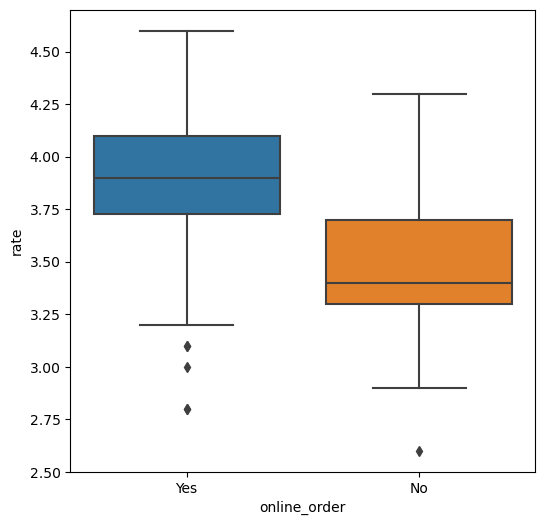

In [16]:
plt.figure(figsize = (6,6))
sns.boxplot(x = "online_order" , y = 'rate' , data = dataframe)

CONCLUSION: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

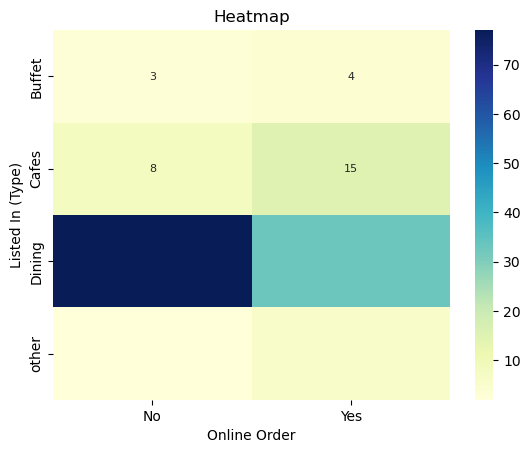

<Figure size 1400x1400 with 0 Axes>

In [27]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d',annot_kws={"size": 8})
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.figure(figsize = (14,14))
plt.show()

CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.